In [1]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk(r'D:\Real Estate\House_Style_Project\House_style_ML\dataset'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np  # Linear algebra
import pandas as pd  # Data processing, CSV file I/O (e.g. pd.read_csv)
import os

# Use a relative path to the dataset directory
dataset_dir = os.path.join(os.getcwd(), 'dataset')

# Walk through the dataset directory
for dirname, _, filenames in os.walk(dataset_dir):
    for filename in filenames:
        print(os.path.join(dirname, filename))


d:\Real Estate\House_Style_Project\House_style_ML\dataset\ML-AR-Chicago School\078f8f88971426ae729d919ce11e6942.jpg
d:\Real Estate\House_Style_Project\House_style_ML\dataset\ML-AR-Chicago School\0df505fa53491a9ac49ba2f00de22f2d.jpg
d:\Real Estate\House_Style_Project\House_style_ML\dataset\ML-AR-Chicago School\1d66809eff05a23dab38d79ec34777fc.jpg
d:\Real Estate\House_Style_Project\House_style_ML\dataset\ML-AR-Chicago School\20c478f272d5d14015eab8170563a454.jpg
d:\Real Estate\House_Style_Project\House_style_ML\dataset\ML-AR-Chicago School\3b6b2134568dd116206bf7ff59e7c1bd.jpg
d:\Real Estate\House_Style_Project\House_style_ML\dataset\ML-AR-Chicago School\4013de6cc22838cd0ab14fd242ecbd84.jpg
d:\Real Estate\House_Style_Project\House_style_ML\dataset\ML-AR-Chicago School\53b07aa2b907885a963ba95ee2ae1aa7.jpg
d:\Real Estate\House_Style_Project\House_style_ML\dataset\ML-AR-Chicago School\57a48b2cf75cac21cd042d06257d326f.jpg
d:\Real Estate\House_Style_Project\House_style_ML\dataset\ML-AR-Chicago 

In [3]:
# !pip install python_splitter

In [4]:
import python_splitter
# If you want to create only Train-Test Folder(not Validation Folder)
# python_splitter.split_from_folder(r"D:\Real Estate\House_Style_Project\House_style_ML\dataset", train = 0.7, test = 0.3)
# Define the dataset folder relative to the script's current directory
# dataset_dir = os.path.join(os.getcwd(), 'dataset')

# Split the dataset into training and testing sets
# 70% training, 30% testing
python_splitter.split_from_folder(os.path.join(os.getcwd(), 'dataset'), train=0.7, test=0.3)

✅Checking SOURCE directory...
0.7 0 0.3
✅Checking percentage validation...
✅Making required directories...
✅Shuffling data...
✅Getting ready for copying files...

-------------Successfully splitted !!!--------------- 


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.applications import MobileNet
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [6]:
target_img_shape = (224,224)
# train_dir = r'D:\Real Estate\House_Style_Project\House_style_ML\Train_Test_Folder\train'
# val_dir = r'D:\Real Estate\House_Style_Project\House_style_ML\Train_Test_Folder\test'
# base_dir = os.path.join(os.getcwd(), 'Train_Test_Folder')

# Define train and validation directories
train_dir = os.path.join(os.path.join(os.getcwd(), 'Train_Test_Folder'), 'train')
val_dir = os.path.join(os.path.join(os.getcwd(), 'Train_Test_Folder'), 'test')

In [7]:
train_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)
train_set = train_datagen.flow_from_directory(train_dir, target_size = target_img_shape, batch_size = 32, class_mode = 'sparse')

# #Augmenting training data with transformations
# train_datagen = ImageDataGenerator(
#     preprocessing_function=preprocess_input,
#     rotation_range=15,      # Randomly rotate images by 20 degrees
#     width_shift_range=0.3,  # Randomly shift images horizontally (15% of the width)
#     height_shift_range=0.3, # Randomly shift images vertically (15% of the height)
#     shear_range=0.9,       # Randomly apply shearing
#     zoom_range=0.1,        # Randomly zoom inside pictures
#     horizontal_flip=True,   # Randomly flip images horizontally
#     fill_mode='nearest'     # Fill pixels when the image is rotated or shifted
# )

# train_set = train_datagen.flow_from_directory(
#     train_dir, 
#     target_size=target_img_shape, 
#     batch_size=32, 
#     class_mode='sparse'
# )

val_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)
val_set = val_datagen.flow_from_directory(val_dir, target_size = target_img_shape, batch_size = 32, class_mode = 'sparse')

Found 286 images belonging to 13 classes.
Found 129 images belonging to 13 classes.


In [8]:
print(train_set.class_indices)
for image_batch, labels_batch in train_set:
    print(image_batch.shape)
    print(labels_batch.shape)

    img = image_batch[0] - image_batch[0].min()
    img /= 275.0
    # plt.imshow(img)
    print('class', labels_batch[0])
    break

{'ML-AR-COLONIAL': 0, 'ML-AR-Chicago School': 1, 'ML-AR-Classic': 2, 'ML-AR-MEDITERRANEAN': 3, 'ML-AR-MID CENTURY': 4, 'ML-AR-Modern': 5, 'ML-AR-Modern Minimal': 6, 'ML-AR-Oriental': 7, 'ML-AR-SCANDINAVIAN': 8, 'ML-AR-THAI': 9, 'ML-AR-TRANSITIONAL': 10, 'ML-AR-TUDOR HOUSE': 11, 'ML-AR-VICTORIAN': 12}
(32, 224, 224, 3)
(32,)
class 11.0


In [9]:
ids, counts = np.unique(train_set.classes, return_counts = True)
print(ids)
print(counts)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12]
[20 20 20 20 26 11 20 20 20 37 20 32 20]


In [10]:
labels = (train_set.class_indices)
labels = dict((v,k) for k,v in labels.items())
labels

for i in ids:
    print('{:>8} = {}'.format(labels[i], counts[i]))

ML-AR-COLONIAL = 20
ML-AR-Chicago School = 20
ML-AR-Classic = 20
ML-AR-MEDITERRANEAN = 20
ML-AR-MID CENTURY = 26
ML-AR-Modern = 11
ML-AR-Modern Minimal = 20
ML-AR-Oriental = 20
ML-AR-SCANDINAVIAN = 20
ML-AR-THAI = 37
ML-AR-TRANSITIONAL = 20
ML-AR-TUDOR HOUSE = 32
ML-AR-VICTORIAN = 20


In [11]:
labels

{0: 'ML-AR-COLONIAL',
 1: 'ML-AR-Chicago School',
 2: 'ML-AR-Classic',
 3: 'ML-AR-MEDITERRANEAN',
 4: 'ML-AR-MID CENTURY',
 5: 'ML-AR-Modern',
 6: 'ML-AR-Modern Minimal',
 7: 'ML-AR-Oriental',
 8: 'ML-AR-SCANDINAVIAN',
 9: 'ML-AR-THAI',
 10: 'ML-AR-TRANSITIONAL',
 11: 'ML-AR-TUDOR HOUSE',
 12: 'ML-AR-VICTORIAN'}

In [12]:
ids, counts = np.unique(val_set.classes, return_counts = True)
print(ids)
print(counts)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12]
[ 9  9  9  9 12  5  9  9  9 17  9 14  9]


In [13]:
_, train_count = np.unique(train_set.classes, return_counts = True)
_, val_count = np.unique(val_set.classes, return_counts = True)

print('Ratio Validation/Training set:', val_count/train_count * 100)

Ratio Validation/Training set: [45.         45.         45.         45.         46.15384615 45.45454545
 45.         45.         45.         45.94594595 45.         43.75
 45.        ]


In [14]:
in_shape = (target_img_shape[0], target_img_shape[1], 3)
in_shape

(224, 224, 3)

In [15]:
# Step 1: Import necessary libraries
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import keras.backend as K
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [16]:
# Step 2: Load the pre-trained ResNet50 model without the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Step 3: Add custom layers for transfer learning
num_classes = 13  # Updated to 13 classes
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global average pooling to reduce dimensionality
# x = Dense(512, activation='relu')(x)  # Fully connected layer
# x = Dropout(0.3)(x)  # Dropout for regularization
x = Dense(256, activation='relu')(x) 
x = Dropout(0.1)(x)   # Dropout to reduce overfitting
x = Dense(128, activation='relu')(x) 
x = Dropout(0.1)(x)
# x = Dense(64, activation='relu')(x) 
# x = Dropout(0.5)(x)  
# x = Dense(32, activation='relu')(x) 
# x = Dropout(0.5)(x)  
predictions = Dense(num_classes, activation='softmax')(x)  # Output layer with softmax for classification
model = Model(inputs=base_model.input, outputs=predictions)

# Step 4: Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False
    
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 24,146,829 (92.11 MB)

 Trainable params: 559,117 (2.13 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [17]:
# Step 5: Compile the model
model.compile(optimizer=Adam(learning_rate=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])

# Step 6: Prepare the data using ImageDataGenerator
# train_dir = r'D:\Real Estate\House_Style_Project\House_style_ML\Train_Test_Folder\train'
# val_dir = r'D:\Real Estate\House_Style_Project\House_style_ML\Train_Test_Folder\test'

# Base directory relative to the current working directory
# base_dir = os.path.join(os.getcwd(), 'Train_Test_Folder')

# Train and validation directories
train_dir = os.path.join(os.path.join(os.getcwd(), 'Train_Test_Folder'), 'train')
val_dir = os.path.join(os.path.join(os.getcwd(), 'Train_Test_Folder'), 'test')

train_data_dir = train_dir  # Replace with your training data path
validation_data_dir = val_dir  # Replace with your validation data path

train_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)

val_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Step 7: Train the model
num_epochs = 200
history = model.fit(
    train_generator,
    epochs=num_epochs,
    validation_data=validation_generator,
    callbacks=[EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)]
)



Found 286 images belonging to 13 classes.
Found 129 images belonging to 13 classes.


c:\Users\Archiculture01\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.1593 - loss: 2.6332 - val_accuracy: 0.4186 - val_loss: 1.8580
Epoch 2/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.5662 - loss: 1.4299 - val_accuracy: 0.6357 - val_loss: 1.2086
Epoch 3/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.7804 - loss: 0.8325 - val_accuracy: 0.6589 - val_loss: 1.1722
Epoch 4/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.8056 - loss: 0.5610 - val_accuracy: 0.6977 - val_loss: 0.9909
Epoch 5/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.9123 - loss: 0.3368 - val_accuracy: 0.7132 - val_loss: 0.8945
Epoch 6/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.8984 - loss: 0.3037 - val_accuracy: 0.7364 - val_loss: 0.8935
Epoch 7/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.9822 - loss: 0.1244 - val_accuracy: 0.6977 - val_loss: 0.9057
Epoch 8/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.9671 - loss: 0.1284 - val_accuracy: 0.7287 - val_loss: 0.8841


In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
plt.rcParams["figure.figsize"] = (20,20)


from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from keras import backend as K
from scipy.ndimage import zoom
import numpy as np
import os
import tensorflow as tf
import keras
# tf.compat.v1.disable_eager_execution()

In [19]:
import tensorflow as tf
import numpy as np
from scipy.ndimage import zoom

def grad_cam(input_model, image, layer_name='conv5_block3_out', H=224, W=224):
    # Ensure the input image is in the correct shape and batch dimension
    image = tf.convert_to_tensor(image, dtype=tf.float32)
    if len(image.shape) == 3:  # If single image, add batch dimension
        image = tf.expand_dims(image, axis=0)

    # Create a model that outputs both the specified convolutional layer and predictions
    grad_model = tf.keras.models.Model(
        [input_model.input],
        [input_model.get_layer(layer_name).output, input_model.output]
    )

    # Forward pass to get outputs and gradients
    with tf.GradientTape() as tape:
        conv_output, predictions = grad_model(image)  # Outputs for conv layer and final predictions
        cls = tf.argmax(predictions[0])  # Get the predicted class
        y_c = predictions[:, cls]       # Probability score of the predicted class
        tape.watch(conv_output)         # Watch the conv layer output for gradients

    grads = tape.gradient(y_c, conv_output)  # Compute gradients wrt conv layer output

    # Weights are the average gradients across the spatial dimensions
    grads_val = grads[0]  # Gradients for the first image in batch
    weights = tf.reduce_mean(grads_val, axis=(0, 1))
    cam = tf.reduce_sum(tf.multiply(weights, conv_output[0]), axis=-1)  # Grad-CAM

    # Apply ReLU
    cam = tf.maximum(cam, 0)
    # Resize to target dimensions (H, W)
    cam = zoom(cam.numpy(), (H / cam.shape[0], W / cam.shape[1]))
    # Normalize the Grad-CAM
    cam = cam / np.max(cam) if np.max(cam) != 0 else cam

    return cam


In [20]:
import cv2
import numpy as np
import tensorflow as tf
from scipy.ndimage import zoom

def grad_cam_plus(input_model, image, layer_name='conv5_block3_out', H=224, W=224):
    # Create a model that outputs the activations of the desired layer and predictions
    layer_output = input_model.get_layer(layer_name).output
    grad_model = tf.keras.models.Model([input_model.inputs], [layer_output, input_model.output])

    # Predict the class
    with tf.GradientTape() as tape:
        conv_output, predictions = grad_model(image)
        cls = tf.argmax(predictions[0])  # Get the predicted class index
        y_c = predictions[:, cls]       # Output for the predicted class
        tape.watch(conv_output)         # Watch the convolutional layer output

    # Get gradients
    grads = tape.gradient(y_c, conv_output)  # First gradients
    conv_output_value = conv_output[0].numpy()  # Convert to NumPy
    grads_value = grads[0].numpy()

    # Compute second and third gradients
    first = grads_value
    second = grads_value * grads_value
    third = grads_value * grads_value * grads_value

    # Compute global sum for the weights
    global_sum = np.sum(conv_output_value.reshape((-1, conv_output_value.shape[-1])), axis=0)

    # Calculate alpha values
    alpha_num = second
    alpha_denom = second * 2.0 + third * global_sum.reshape((1, 1, grads_value.shape[-1]))
    alpha_denom = np.where(alpha_denom != 0.0, alpha_denom, np.ones(alpha_denom.shape))
    alphas = alpha_num / alpha_denom

    # Normalize alpha values
    alpha_normalization_constant = np.sum(np.sum(alphas, axis=0), axis=0)
    alphas /= alpha_normalization_constant.reshape((1, 1, grads_value.shape[-1]))

    # Calculate the weights and Grad-CAM++ map
    weights = np.maximum(first, 0.0)
    deep_linearization_weights = np.sum((weights * alphas).reshape((-1, grads_value.shape[-1])), axis=0)
    grad_CAM_map = np.sum(deep_linearization_weights * conv_output_value, axis=2)

    # Process the Grad-CAM++ map
    cam = np.maximum(grad_CAM_map, 0)
    cam = zoom(cam, (H / cam.shape[0], W / cam.shape[1]))  # Resize to match the input image
    cam = cam / np.max(cam)  # Normalize the map

    return cam

# Visualize Grad-CAM++ as contours
def visualize_contours(img_path, cam, threshold=0.5):
    # Load and normalize the original image
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))  # Ensure the image is the same size as the Grad-CAM++
    
    # Convert the heatmap to a binary mask
    heatmap = (cam * 255).astype(np.uint8)  # Scale heatmap to 0-255
    _, binary_mask = cv2.threshold(heatmap, int(threshold * 255), 255, cv2.THRESH_BINARY)
    
    # Find contours
    contours, _ = cv2.findContours(binary_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    # Draw contours on the original image
    contoured_img = cv2.drawContours(img.copy(), contours, -1, (0, 255, 0), 1)  # Green contours with thickness 2
    
    return contoured_img

In [21]:
# images = [r"D:\Real Estate\_PLP-ML-AI\House_data\dataset\ML-AR-Classic\0bfde992c25d5e7b22fbe30e4df3ef17.jpg",
#           r"D:\Real Estate\_PLP-ML-AI\House_data\dataset\ML-AR-COLONIAL\cc1fb64822527ba290bbe117c728efc5.jpg",
#           r"D:\Real Estate\_PLP-ML-AI\House_data\dataset\ML-AR-MEDITERRANEAN\1c04c43b60952108b0777c82e4b3b59c.jpg",
#           r"D:\Real Estate\_PLP-ML-AI\House_data\Train_Test_Folder\test\ML-AR-Modern Minimal\768b715afe1ff92bb2732f8e2c481f42.jpg",
#           r"D:\Real Estate\_PLP-ML-AI\House_data\dataset\ML-AR-Modern\32f24003e851b205219c8770d223c724.jpg"]

In [22]:
import glob
# Get all images in the subfolders of "test"
# images = [f for f in glob.glob(r'D:\Real Estate\House_Style_Project\House_style_ML\Train_Test_Folder\test\**\*', recursive=True) if not os.path.isdir(f)]
# test_dir = os.path.join(os.getcwd(), 'Train_Test_Folder', 'test')

# List all images in the test folder (non-directory files only)
images = [
    f for f in glob.glob(os.path.join(os.path.join(os.getcwd(), 'Train_Test_Folder', 'test'), '**', '*'), recursive=True)
    if not os.path.isdir(f)
]
images

['d:\\Real Estate\\House_Style_Project\\House_style_ML\\Train_Test_Folder\\test\\ML-AR-Chicago School\\078f8f88971426ae729d919ce11e6942.jpg',
 'd:\\Real Estate\\House_Style_Project\\House_style_ML\\Train_Test_Folder\\test\\ML-AR-Chicago School\\1d66809eff05a23dab38d79ec34777fc.jpg',
 'd:\\Real Estate\\House_Style_Project\\House_style_ML\\Train_Test_Folder\\test\\ML-AR-Chicago School\\4013de6cc22838cd0ab14fd242ecbd84.jpg',
 'd:\\Real Estate\\House_Style_Project\\House_style_ML\\Train_Test_Folder\\test\\ML-AR-Chicago School\\7c8675fe05dee91cb5255caf3e89c0dc.jpg',
 'd:\\Real Estate\\House_Style_Project\\House_style_ML\\Train_Test_Folder\\test\\ML-AR-Chicago School\\7dc67da5bedb18b15a53daa8e6312939.jpg',
 'd:\\Real Estate\\House_Style_Project\\House_style_ML\\Train_Test_Folder\\test\\ML-AR-Chicago School\\A-building-by-the-Chicago-School. (1).jpg',
 'd:\\Real Estate\\House_Style_Project\\House_style_ML\\Train_Test_Folder\\test\\ML-AR-Chicago School\\e871176da02698a319b3bed33a30bb64.jpg',
 

In [23]:
import numpy as np

# Assuming you have a total of 5 classes for your data
custom_class_labels = labels

def custom_decode_predictions(predictions, top=5):
    # predictions: model's output, typically a batch of arrays
    results = []
    for pred in predictions:
        # Get indices of top predictions
        top_indices = pred.argsort()[-top:][::-1]
        result = [(i, custom_class_labels[i], pred[i]) for i in top_indices]
        results.append(result)
    return results

def top_index(predictions, top=5):
    # predictions: model's output, typically a batch of arrays
    top_idx = []
    for pred in predictions:
        # Get indices of top predictions
        top_idx = pred.argsort()[-top:][::-1]
        # result = [(i, custom_class_labels[i], pred[i]) for i in top_indices]
        # results.append(result)
    return top_idx

# print([layer.name for layer in model.layers])

In [24]:
# Uncomment below for visualize test

In [25]:
# # import tensorflow.keras.backend as K
# # import tensorflow as tf
# # tf.compat.v1.disable_eager_execution()
# for pp, path in enumerate(images):
#     orig_img = load_img(path, target_size=(224, 224))
#     img = img_to_array(orig_img)
#     img = np.expand_dims(img, axis=0)
#     img = preprocess_input(img)
#     print(img.shape) 
#     # predictions = model.predict(img)
#     top_n = 5
#     # top = decode_predictions(predictions, top=top_n)[0]
    
#     # cls = np.argsort(predictions[0])[-top_n:][::-1]
    
#     predictions = model.predict(img)  # 'img' is the preprocessed input
#     # Print the results
        
#     top = top_index(predictions, top=top_n)
#     print('top', top)
#     cls = np.argsort(predictions[0])[-top_n:][::-1]
#     # cls = custom_decode_predictions(predictions, top=5)
#     decoded_predictions = custom_decode_predictions(predictions, top=5)
#     for i, pred in enumerate(decoded_predictions):
#         print(f"Image {i+1} predictions:")
#         for idx, label, score in pred:
#             print(f"  {label}: {score:.4f}")
#     predicted_label = decoded_predictions[0]        
#     print('cls shape', cls.shape)
#     print('cls', cls)
    
#     gradcam = grad_cam(model, img)
#     gradcamplus = grad_cam_plus(model, img)

#     print(path)
#     print("Class activation map for:", top[0])

#     # fig, ax = plt.subplots(nrows=1, ncols=3) # , figsize=(8, 6)
#     # plt.subplot(1, 3, 1)
#     # # Extracting the actual class from the file path
#     # actual_cls = os.path.basename(os.path.dirname(path))  # Assumes the image file is within a folder named by its class
#     # plt.imshow(orig_img)
#     # # print('Actual Class:', actual_cls)
#     # plt.title('Actual:' + actual_cls)
#     # plt.axis('off')

#     # plt.subplot(1, 3, 2)
#     # LL = decoded_predictions[0][0]
#     # # Get the predicted class (highest probability)
#     # # pred_cls = list(labels.values())[np.argmax(pred, -1)[0]]
#     # # print('Prediction:', pred_cls)
#     # plt.imshow(orig_img)
#     # # plt.imshow(gradcamplus, alpha=0.8, cmap="jet")
#     # # plt.contour(gradcamplus, levels=10, cmap='jet', alpha=0.6) 
#     # # Apply contours visualization
#     # contoured_img = visualize_contours(path, gradcam, threshold=0.5)
#     # plt.imshow(cv2.cvtColor(contoured_img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct display
#     # plt.title('Predicted:'+ LL[1])
#     # plt.axis('off')
#     # plt.show()
    
#     # plt.subplot(1, 3, 3)
#     # LL = decoded_predictions[0][0]
#     # # Get the predicted class (highest probability)
#     # # pred_cls = list(labels.values())[np.argmax(pred, -1)[0]]
#     # # print('Prediction:', pred_cls)
#     # plt.imshow(orig_img)
#     # # plt.imshow(gradcamplus, alpha=0.8, cmap="jet")
#     # # plt.contour(gradcamplus, levels=10, cmap='jet', alpha=0.6) 
#     # # Apply contours visualization
#     # contoured_img = visualize_contours(path, gradcamplus, threshold=0.5)
#     # plt.imshow(cv2.cvtColor(contoured_img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct display
#     # plt.title('Predicted:'+ LL[1])
#     # plt.axis('off')
#     # plt.show()
    
 
#     # Create a single row with 3 columns
#     fig, ax = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns, adjust figure size

#     # Subplot 1: Original Image with Actual Class
#     actual_cls = os.path.basename(os.path.dirname(path))  # Assumes the folder name as the class
#     ax[0].imshow(orig_img)
#     ax[0].set_title(f"Actual: {actual_cls}")
#     ax[0].axis("off")

#     # Subplot 2: Image with Grad-CAM Visualization
#     ax[1].imshow(orig_img)
#     ax[1].imshow((cv2.cvtColor(visualize_contours(path, gradcam, threshold=0.5), cv2.COLOR_BGR2RGB)), alpha=1, cmap="jet")  # Grad-CAM overlay
#     ax[1].set_title(f"Grad CAM Predicted: {decoded_predictions[0][0][1]}")
#     ax[1].axis("off")

#     # Subplot 3: Image with Grad-CAM++ Visualization
#     ax[2].imshow(orig_img)
#     ax[2].imshow((cv2.cvtColor(visualize_contours(path, gradcamplus, threshold=0.5), cv2.COLOR_BGR2RGB)), alpha=1, cmap="jet")  # Grad-CAM++ overlay
#     ax[2].set_title(f"Grad CAM++ Predicted: {decoded_predictions[0][0][1]}")
#     ax[2].axis("off")

#     # Adjust layout for better spacing
#     plt.tight_layout()
#     plt.show()

# การแบ่งส่วนความหมายแบบหลายคลาส

In [26]:
import keras
from keras import layers
from keras import ops

import os
import numpy as np
from glob import glob
import cv2
from scipy.io import loadmat
import matplotlib.pyplot as plt

# For data preprocessing
from tensorflow import image as tf_image
from tensorflow import data as tf_data
from tensorflow import io as tf_io

In [127]:
import numpy as np
from scipy.io import savemat

# Define the colormap as an array of shape (num_classes, 3)
# Each row corresponds to an RGB triplet for a class
num_classes = 13
# colormap = np.array([
#     [0, 0, 0],       # Class 0 - Background (Black)
#     [128, 0, 0],     # Class 1 - Dark Red
#     [0, 128, 0],     # Class 2 - Dark Green
#     [128, 128, 0],   # Class 3 - Olive
#     [0, 0, 128],     # Class 4 - Dark Blue
#     [128, 0, 128],   # Class 5 - Purple
#     [0, 128, 128],   # Class 6 - Teal
#     [128, 128, 128], # Class 7 - Gray
#     [64, 0, 0],      # Class 8 - Brown
#     [192, 0, 0],     # Class 9 - Red
#     [64, 128, 0],    # Class 10 - Green
#     [192, 128, 0],   # Class 11 - Orange
#     [64, 0, 128],    # Class 12 - Blue
# ], dtype=np.uint8)

colormap = np.array([[ 0,  0,  0],
       [50,  0,  0],
       [99,  0,  0],
       [ 0, 33,  0],
       [66,  0, 19],
       [99, 33,  0],
       [ 0,  0, 33],
       [ 0, 46, 86],
       [33, 33,  0],
       [ 0, 33, 33],
       [33, 19,  0],
       [20, 33, 50],
       [ 0, 50,  0]], dtype=np.uint8)

# Save the colormap to a .mat file
savemat("colormap.mat", {"colormap": colormap})
print("Colormap saved to colormap.mat")


Colormap saved to colormap.mat


In [128]:
from scipy.io import loadmat

# Load the colormap
colormap = loadmat("colormap.mat")["colormap"]
print("Colormap loaded:", colormap)


Colormap loaded: [[ 0  0  0]
 [50  0  0]
 [99  0  0]
 [ 0 33  0]
 [66  0 19]
 [99 33  0]
 [ 0  0 33]
 [ 0 46 86]
 [33 33  0]
 [ 0 33 33]
 [33 19  0]
 [20 33 50]
 [ 0 50  0]]


Processing: dataset\ML-AR-TRANSITIONAL\6a1458bd4fd837c282f7d1e46b98a2a6.jpg
image_tensor <class 'tensorflow.python.framework.ops.EagerTensor'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
np.expand_dims((image_tensor)) (1, 224, 224, 3)
Raw predictions shape: (1, 13)
Predicted class index: 10
prediction_mask <class 'numpy.int64'>
Single class prediction: 10
RGB color for class 10: [228 108   0]
prediction_colormap <class 'numpy.ndarray'>


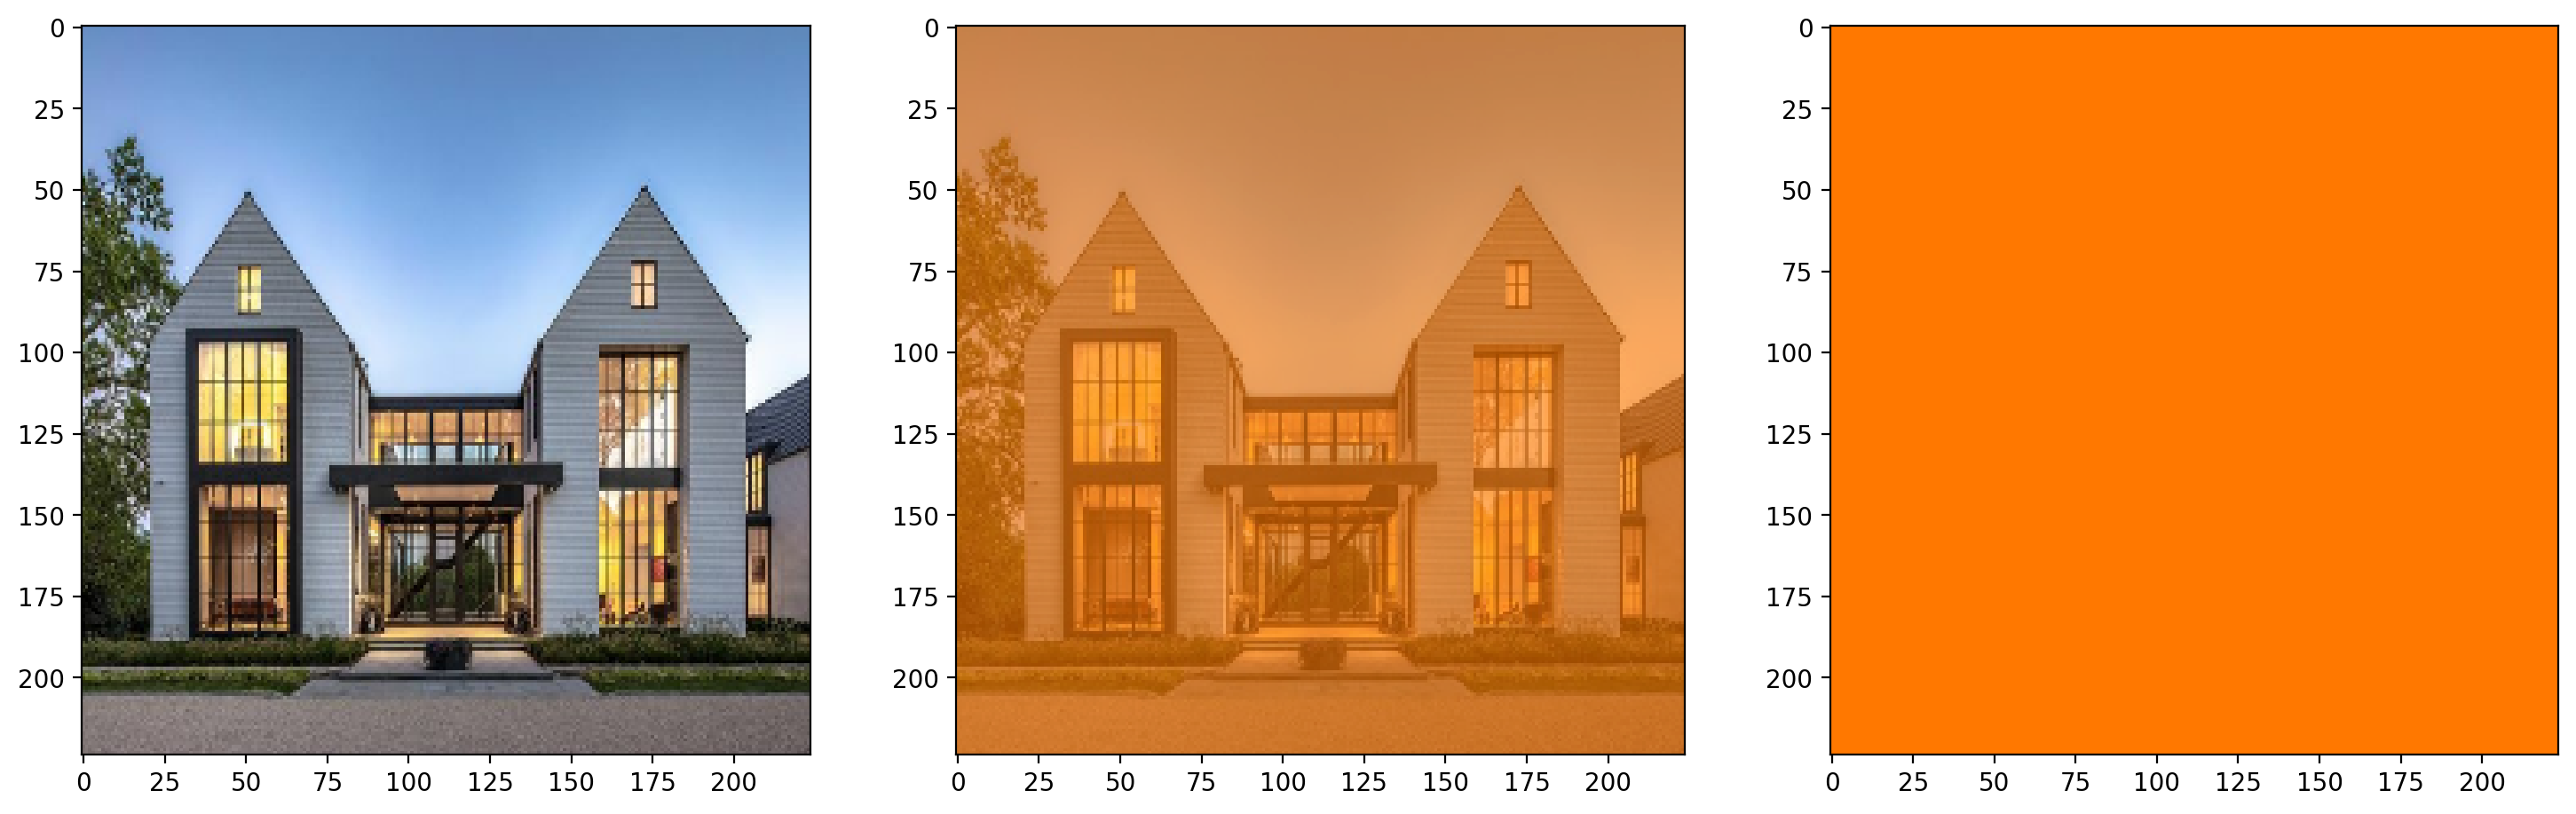

In [130]:
import tensorflow as tf
from tensorflow import io as tf_io
from tensorflow.image import decode_image as tf_decode_image, resize as tf_resize
# Loading the Colormap
colormap = loadmat(
    "colormap.mat"
)["colormap"]
colormap = colormap * 100
colormap = colormap.astype(np.uint8)

# def read_image(image_path, mask=False):
#     image = tf_io.read_file(image_path)
#     if mask:
#         image = tf_image.decode_png(image, channels=1)
#         image.set_shape([None, None, 1])
#         image = tf_image.resize(images=image, size=[224, 224])
#     else:
#         image = tf_image.decode_png(image, channels=3)
#         image.set_shape([None, None, 3])
#         image = tf_image.resize(images=image, size=[224, 224])
#     return image

def read_image(image_path, mask=False):
    # Read the image file
    image = tf.io.read_file(image_path)
    
    # Dynamically decode the image
    image = tf.image.decode_image(image, channels=1 if mask else 3, expand_animations=False)
    
    # Set the shape for the decoded image
    image.set_shape([None, None, 1 if mask else 3])
    
    # Resize the image to target dimensions
    image = tf.image.resize(image, size=[224, 224])
    
    return image

# def infer(model, image_tensor):
#     predictions = model.predict(np.expand_dims((image_tensor), axis=0))
#     print('np.expand_dims((image_tensor))', np.expand_dims((image_tensor), axis=0).shape)
#     # print('predictions 1', predictions)
#     predictions = np.squeeze(predictions)
#     print('predictions 2', predictions.shape)
#     predictions = np.argmax(predictions, axis=2)
#     # print('predictions 3', predictions)
#     return predictions

def infer(model, image_tensor):
    predictions = model.predict(np.expand_dims(image_tensor, axis=0))
    print('np.expand_dims((image_tensor))', np.expand_dims(image_tensor, axis=0).shape)
    print('Raw predictions shape:', predictions.shape)
    
    if len(predictions.shape) == 2:  # [batch_size, num_classes]
        predicted_class = np.argmax(predictions[0])  # Extract class index
        print(f"Predicted class index: {predicted_class}")
        return predicted_class
    elif len(predictions.shape) == 4:  # [batch_size, height, width, num_classes]
        predictions = np.squeeze(predictions, axis=0)  # Remove batch dimension
        predictions = np.argmax(predictions, axis=2)  # Get class indices per pixel
        print('Predictions shape after processing:', predictions.shape)
        return predictions
    else:
        raise ValueError(f"Unexpected predictions shape: {predictions.shape}")



# def decode_segmentation_masks(mask, colormap, n_classes):
#     r = np.zeros_like(mask).astype(np.uint8)
#     g = np.zeros_like(mask).astype(np.uint8)
#     b = np.zeros_like(mask).astype(np.uint8)
#     for l in range(0, n_classes):
#         idx = mask == l
#         r[idx] = colormap[l, 0]
#         g[idx] = colormap[l, 1]
#         b[idx] = colormap[l, 2]
#     rgb = np.stack([r, g, b], axis=2)
#     return rgb
def decode_segmentation_masks(mask, colormap, n_classes):
    if isinstance(mask, (int, np.integer)):  # Handle single class prediction
        print(f"Single class prediction: {mask}")
        
        # Ensure the class index is within range
        if mask >= n_classes:
            raise ValueError(f"Predicted class {mask} exceeds colormap size {n_classes}")
        
        # Return a 224x224 image filled with the color of the predicted class
        rgb_color = colormap[mask]
        print(f"RGB color for class {mask}: {rgb_color}")
        rgb_image = np.full((224, 224, 3), rgb_color, dtype=np.uint8)
        return rgb_image
    
    # For segmentation masks
    r = np.zeros_like(mask, dtype=np.uint8)
    g = np.zeros_like(mask, dtype=np.uint8)
    b = np.zeros_like(mask, dtype=np.uint8)

    for l in range(n_classes):
        idx = mask == l
        r[idx] = colormap[l, 0]
        g[idx] = colormap[l, 1]
        b[idx] = colormap[l, 2]

    return np.stack([r, g, b], axis=2)




def get_overlay(image, colored_mask):
    image = keras.utils.array_to_img(image)
    image = np.array(image).astype(np.uint8)
    overlay = cv2.addWeighted(image, 0.35, colored_mask, 0.65, 0)
    return overlay


def plot_samples_matplotlib(display_list, figsize=(5, 3)):
    _, axes = plt.subplots(nrows=1, ncols=len(display_list), figsize=figsize)
    for i in range(len(display_list)):
        if display_list[i].shape[-1] == 3:
            axes[i].imshow(keras.utils.array_to_img(display_list[i]))
        else:
            axes[i].imshow(display_list[i])
    plt.show()


# def plot_predictions(images_list, colormap, model):
#     for image_file in images_list:
#         image_tensor = read_image(image_file)
#         print('image_tensor', type(image_tensor))
#         prediction_mask = infer(image_tensor=image_tensor, model=model)
#         print('prediction_mask', type(prediction_mask))
#         prediction_colormap = decode_segmentation_masks(prediction_mask, colormap, 13)
#         print('prediction_colormap', type(prediction_colormap))
#         overlay = get_overlay(image_tensor, prediction_colormap)
#         print('overlay', type(overlay))
#         plot_samples_matplotlib(
#             [image_tensor, overlay, prediction_colormap], figsize=(18, 14)
#         )

def plot_predictions(images_list, colormap, model):
    for image_file in images_list:
        print(f"Processing: {image_file}")
        
        # Read and preprocess the image
        image_tensor = read_image(image_file)
        print('image_tensor', type(image_tensor))
        
        # Get predictions
        prediction_mask = infer(image_tensor=image_tensor, model=model)
        print('prediction_mask', type(prediction_mask))
        
        # Decode predictions into RGB colors
        prediction_colormap = decode_segmentation_masks(prediction_mask, colormap, n_classes=13)
        print('prediction_colormap', type(prediction_colormap))
        
        # Display the result
        if isinstance(prediction_mask, int):  # Classification output
            plt.figure(figsize=(6, 4))
            plt.imshow(prediction_colormap)
            plt.title(f"Predicted Class: {prediction_mask}")
            plt.axis("off")
            plt.show()
        else:  # Segmentation output
            overlay = get_overlay(image_tensor, prediction_colormap)
            plot_samples_matplotlib(
                [image_tensor, overlay, prediction_colormap], figsize=(18, 14)
            )


file_path = r"dataset\ML-AR-TRANSITIONAL\6a1458bd4fd837c282f7d1e46b98a2a6.jpg"
plot_predictions([file_path], colormap, model=model)


In [117]:
file_path = r"dataset\ML-AR-VICTORIAN\26df89b686acc209dbc5ce6c01485d54.jpg"
plot_predictions([file_path], colormap, model=model)
# if os.path.exists(file_path) and tf.io.gfile.exists(file_path):
#     try:
#         plot_predictions([file_path], colormap, model=model)
#     except Exception as e:
#         print(f"Error: {e}")
# else:
#     print("Error: File does not exist or is inaccessible.")


image_tensor <class 'tensorflow.python.framework.ops.EagerTensor'>


InvalidArgumentError: Graph execution error:

Detected at node convolution defined at (most recent call last):
<stack traces unavailable>
Depth of input must be a multiple of depth of filter: 1 vs 3

Stack trace for op definition: 
File "<frozen runpy>", line 198, in _run_module_as_main
File "<frozen runpy>", line 88, in _run_code
File "C:\Users\Archiculture01\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>
File "C:\Users\Archiculture01\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1075, in launch_instance
File "C:\Users\Archiculture01\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 739, in start
File "C:\Users\Archiculture01\AppData\Roaming\Python\Python312\site-packages\tornado\platform\asyncio.py", line 205, in start
File "c:\Users\Archiculture01\anaconda3\Lib\asyncio\base_events.py", line 641, in run_forever
File "c:\Users\Archiculture01\anaconda3\Lib\asyncio\base_events.py", line 1987, in _run_once
File "c:\Users\Archiculture01\anaconda3\Lib\asyncio\events.py", line 88, in _run
File "C:\Users\Archiculture01\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue
File "C:\Users\Archiculture01\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelbase.py", line 534, in process_one
File "C:\Users\Archiculture01\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell
File "C:\Users\Archiculture01\AppData\Roaming\Python\Python312\site-packages\ipykernel\ipkernel.py", line 362, in execute_request
File "C:\Users\Archiculture01\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelbase.py", line 778, in execute_request
File "C:\Users\Archiculture01\AppData\Roaming\Python\Python312\site-packages\ipykernel\ipkernel.py", line 449, in do_execute
File "C:\Users\Archiculture01\AppData\Roaming\Python\Python312\site-packages\ipykernel\zmqshell.py", line 549, in run_cell
File "C:\Users\Archiculture01\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py", line 3075, in run_cell
File "C:\Users\Archiculture01\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py", line 3130, in _run_cell
File "C:\Users\Archiculture01\AppData\Roaming\Python\Python312\site-packages\IPython\core\async_helpers.py", line 128, in _pseudo_sync_runner
File "C:\Users\Archiculture01\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py", line 3334, in run_cell_async
File "C:\Users\Archiculture01\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py", line 3517, in run_ast_nodes
File "C:\Users\Archiculture01\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code
File "C:\Users\Archiculture01\AppData\Local\Temp\ipykernel_32432\185073028.py", line 2, in <module>
File "C:\Users\Archiculture01\AppData\Local\Temp\ipykernel_32432\3743879389.py", line 83, in plot_predictions
File "C:\Users\Archiculture01\AppData\Local\Temp\ipykernel_32432\3743879389.py", line 39, in infer
File "c:\Users\Archiculture01\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler
File "c:\Users\Archiculture01\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 510, in predict
File "c:\Users\Archiculture01\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 208, in one_step_on_data_distributed
File "c:\Users\Archiculture01\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 198, in one_step_on_data
File "c:\Users\Archiculture01\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 96, in predict_step
File "c:\Users\Archiculture01\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler
File "c:\Users\Archiculture01\anaconda3\Lib\site-packages\keras\src\layers\layer.py", line 899, in __call__
File "c:\Users\Archiculture01\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler
File "c:\Users\Archiculture01\anaconda3\Lib\site-packages\keras\src\ops\operation.py", line 46, in __call__
File "c:\Users\Archiculture01\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 156, in error_handler
File "c:\Users\Archiculture01\anaconda3\Lib\site-packages\keras\src\models\functional.py", line 182, in call
File "c:\Users\Archiculture01\anaconda3\Lib\site-packages\keras\src\ops\function.py", line 171, in _run_through_graph
File "c:\Users\Archiculture01\anaconda3\Lib\site-packages\keras\src\models\functional.py", line 584, in call
File "c:\Users\Archiculture01\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler
File "c:\Users\Archiculture01\anaconda3\Lib\site-packages\keras\src\layers\layer.py", line 899, in __call__
File "c:\Users\Archiculture01\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler
File "c:\Users\Archiculture01\anaconda3\Lib\site-packages\keras\src\ops\operation.py", line 46, in __call__
File "c:\Users\Archiculture01\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 156, in error_handler
File "c:\Users\Archiculture01\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py", line 243, in call
File "c:\Users\Archiculture01\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py", line 233, in convolution_op
File "c:\Users\Archiculture01\anaconda3\Lib\site-packages\keras\src\ops\nn.py", line 901, in conv
File "c:\Users\Archiculture01\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\nn.py", line 256, in conv
File "c:\Users\Archiculture01\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\nn.py", line 244, in _conv_xla
File "c:\Users\Archiculture01\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\nn.py", line 231, in _conv

	 [[{{node convolution}}]]
	tf2xla conversion failed while converting __inference__conv_xla_29970[]. Run with TF_DUMP_GRAPH_PREFIX=/path/to/dump/dir and --vmodule=xla_compiler=2 to obtain a dump of the compiled functions.
	 [[functional_1/conv1_conv_1/StatefulPartitionedCall]] [Op:__inference_one_step_on_data_distributed_31759]